In [26]:
import ezc3d
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

rcParams['font.family'] = 'monospace'

In [27]:
# The c3d file naming convention is detailed in the baseball_hitting README. 
# Each file is named according to the following values.

user_id = 103
session_id = 391
height = 73        # inches
weight = 183       # pounds
side = "R"
swing_number = 16
exit_velo = 97.7

obm_repo_root_path = "/Users/leofeingold/Documents/GitHub/openbiomechanics"
c3d_files_path = obm_repo_root_path + "/baseball_hitting/data/c3d"
c3d_file_path = c3d_files_path + f"/{user_id:06}/{user_id:06}_{session_id:06}_{height}_{weight}_{side}_{swing_number:03}_{str(exit_velo).replace('.', '')}.c3d"

# alternatively can just copy path of any specific file in baseball_hitting, data, c3d




In [28]:
# create the c3d object
c = ezc3d.c3d(c3d_file_path)
print(c["header"]["points"])

{'size': 54, 'frame_rate': 360.0, 'first_frame': 0, 'last_frame': 767}


In [29]:
# labels of each marker
labels = c["parameters"]["POINT"]["LABELS"]["value"]
print(labels)

['C7', 'CLAV', 'LANK', 'LASI', 'LBHD', 'LELB', 'LFHD', 'LFIN', 'LFRM', 'LHEE', 'LKNE', 'LMANK', 'LMELB', 'LMKNE', 'LPSI', 'LSHO', 'LTHI', 'LTIB', 'LTOE', 'LUPA', 'LWRA', 'LWRB', 'Marker1', 'Marker2', 'Marker3', 'Marker4', 'Marker5', 'Marker6', 'Marker7', 'Marker8', 'Marker9', 'RANK', 'RASI', 'RBAK', 'RBHD', 'RELB', 'RFHD', 'RFIN', 'RFRM', 'RHEE', 'RKNE', 'RMANK', 'RMELB', 'RMKNE', 'RPSI', 'RSHO', 'RTHI', 'RTIB', 'RTOE', 'RUPA', 'RWRA', 'RWRB', 'STRN', 'T10']


In [30]:
points = c["data"]["points"]
num_markers = c['header']['points']['size']
print(num_markers)

# the shape is 4Xnum_markersXnum_frames
print(points.shape)


54
(4, 54, 768)


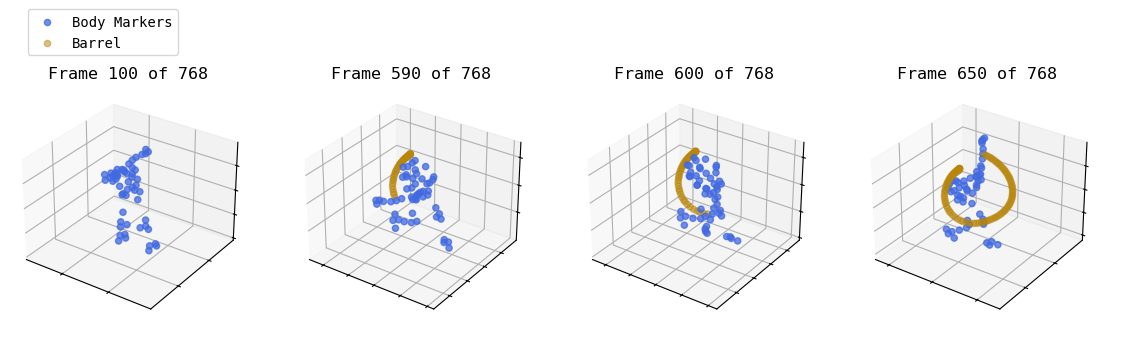

In [31]:
# calculate the index of the barrel
marker5_index = [i for i, label in enumerate(labels) if label == "Marker5"][0]


fig = plt.figure(figsize=(14, 5))

# pick the frames to show
select_frames = [100, 590, 600, 650]

# the approximate start of the swing
approx_swing_init_frame = 550

# for each frame we want
for i, frame in enumerate(select_frames):
    # make a new plot
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    # the x,y,z coordinates. the first paramter is the dimension, second is the markers (we select all of them), and third is the frame we want
    x = points[0, :, frame]
    y = points[1, :, frame]
    z = points[2, :, frame]

    # make a scatter plot of the frames we want
    marker_points = ax.scatter(x, y, z, alpha=0.75, color="royalblue")

    # plot the position (and previous path) of the barrel
    barrel_points = ax.scatter(
        # first parameter is the dimension, second in the index of the marker we want (in this case the marker on the barrel), and the last parameter is the frames we want (from the start of the swing up to the frame we want)
        xs=points[0, marker5_index, approx_swing_init_frame:frame],
        ys=points[1, marker5_index, approx_swing_init_frame:frame],
        zs=points[2, marker5_index, approx_swing_init_frame:frame],
        color="darkgoldenrod",
        alpha=0.5
    )
    ax.set_title(f"Frame {frame} of 768")
    ax.axis('equal')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.view_init(elev=30, azim=-55, roll=0)
    
fig.legend((marker_points, barrel_points), ("Body Markers", "Barrel"), bbox_to_anchor=(0, 0.5, 0.25, 0.4))
plt.show()